# Implementing Distance Measures on Their own
The purpose is to generate the proximity matrix without using any of the methods but just distance measures

- Jake: Yes, this would be separate from the other models and wou be used for comparisons for the portfolio benchmarking.  tslearn has implementations a lot of these distances (https://github.com/tslearn-team/tslearn/tree/main/tslearn/metrics) which we could use or borrow from.  It might be nice to have a wrapper similar to the pairwise_distance function in sklearn, but for the time series metrics.

## Demonstration of Distance Matrix Computation
Below, we demonstrate how to compute a distance matrix for a list of time series using the helper functions.

In [9]:
# Import necessary libraries
import numpy as np
from distance_helpers import compute_distance_matrix

#Data
from aeon.datasets import load_gunpoint
from aeon.datasets import load_basic_motions

#Adjust the path
import sys
sys.path.insert(0, '/yunity/arusty/PF-GAP')

# Load Data
XTRAIN, YTRAIN = load_gunpoint(split="TRAIN")
XTEST, YTEST = load_gunpoint(split="TEST")

# XTRAIN, YTRAIN = load_basic_motions(split="TRAIN")
# XTEST, YTEST = load_basic_motions(split="TEST")

#Generate random static variables to test algorithm
XSTATIC = np.random.rand(XTRAIN.shape[0], 45)
XSTATIC_TEST = np.random.rand(XTEST.shape[0], 45)

In [10]:
# Compute the distance matrix using DTW
distance_matrix = compute_distance_matrix(XTRAIN, metric="dtw")
print(f"Shape {distance_matrix.shape} Distance Matrix (DTW):")
print(distance_matrix)

Shape (50, 50) Distance Matrix (DTW):
[[ 0.          4.62126067  4.84338668 ...  5.19192617  8.12897137
  12.07692907]
 [ 4.62126067  0.          2.49058685 ...  2.77968935  4.19359482
  12.15547782]
 [ 4.84338668  2.49058685  0.         ...  2.85456547  4.11050844
  11.19458226]
 ...
 [ 5.19192617  2.77968935  2.85456547 ...  0.          4.84733788
  12.29014883]
 [ 8.12897137  4.19359482  4.11050844 ...  4.84733788  0.
  11.75686358]
 [12.07692907 12.15547782 11.19458226 ... 12.29014883 11.75686358
   0.        ]]


In [11]:
# Compute the distance matrix using Soft-DTW
soft_dtw_matrix = compute_distance_matrix(XTRAIN, metric="soft_dtw")
print("Distance Matrix (Soft-DTW):")
print(soft_dtw_matrix)

Distance Matrix (Soft-DTW):
[[0.00000000e+00 2.13560502e+01 2.34583945e+01 ... 2.69560974e+01
  6.60801756e+01 1.45852216e+02]
 [2.13560502e+01 5.68434189e-14 6.20302284e+00 ... 7.72667286e+00
  1.75862375e+01 1.47755641e+02]
 [2.34583945e+01 6.20302284e+00 1.13686838e-13 ... 8.14854401e+00
  1.68962797e+01 1.25318672e+02]
 ...
 [2.69560974e+01 7.72667286e+00 8.14854401e+00 ... 0.00000000e+00
  2.34966845e+01 1.51047758e+02]
 [6.60801756e+01 1.75862375e+01 1.68962797e+01 ... 2.34966845e+01
  5.68434189e-14 1.38223841e+02]
 [1.45852216e+02 1.47755641e+02 1.25318672e+02 ... 1.51047758e+02
  1.38223841e+02 1.13686838e-13]]


In [12]:
# Compute the distance matrix using Euclidean distance
euclidean_matrix = compute_distance_matrix(XSTATIC, metric="euclidean")
print("Distance Matrix (Euclidean):")
print(euclidean_matrix)

Distance Matrix (Euclidean):
[[0.         2.64409914 2.46222392 ... 2.90519999 2.6189934  2.61110917]
 [2.64409914 0.         2.50097648 ... 2.7149718  2.71064452 2.55758586]
 [2.46222392 2.50097648 0.         ... 2.94721901 2.93932454 2.60249182]
 ...
 [2.90519999 2.7149718  2.94721901 ... 0.         2.82551088 2.68762707]
 [2.6189934  2.71064452 2.93932454 ... 2.82551088 0.         3.0172164 ]
 [2.61110917 2.55758586 2.60249182 ... 2.68762707 3.0172164  0.        ]]


In [13]:
# Compute the distance matrix using Manhattan distance
manhattan_matrix = compute_distance_matrix(XSTATIC, metric="manhattan")
print("Distance Matrix (Manhattan):")
print(manhattan_matrix)

Distance Matrix (Manhattan):
[[ 0.         14.4417641  13.04559094 ... 16.29210123 14.69877824
  14.31056114]
 [14.4417641   0.         14.14365796 ... 14.62933849 15.29263562
  13.62964523]
 [13.04559094 14.14365796  0.         ... 16.98242989 15.92322889
  13.80745268]
 ...
 [16.29210123 14.62933849 16.98242989 ...  0.         15.51480739
  14.22865159]
 [14.69877824 15.29263562 15.92322889 ... 15.51480739  0.
  16.80328807]
 [14.31056114 13.62964523 13.80745268 ... 14.22865159 16.80328807
   0.        ]]


In [14]:
# Compute the distance matrix using Cosine distance
cosine_matrix = compute_distance_matrix(XSTATIC, metric="cosine")
print("Distance Matrix (Cosine):")
print(cosine_matrix)

Distance Matrix (Cosine):
[[0.         0.27738847 0.22731054 ... 0.32149762 0.25519356 0.21698534]
 [0.27738847 0.         0.2286303  ... 0.27258258 0.26652691 0.20560726]
 [0.22731054 0.2286303  0.         ... 0.30778247 0.30113682 0.2090955 ]
 ...
 [0.32149762 0.27258258 0.30778247 ... 0.         0.28081861 0.2245128 ]
 [0.25519356 0.26652691 0.30113682 ... 0.28081861 0.         0.28157143]
 [0.21698534 0.20560726 0.2090955  ... 0.2245128  0.28157143 0.        ]]


In [15]:
# Compute the distance matrix using Return Correlation
return_corr_matrix = compute_distance_matrix(XTRAIN, metric="return_correlation")
print(f"Shape {return_corr_matrix.shape} Distance Matrix (Return Correlation):")
print(return_corr_matrix)

Shape (50, 50) Distance Matrix (Return Correlation):
[[0.         0.33178612 0.43888003 ... 0.84672975 0.75273363 1.0100319 ]
 [0.33178612 0.         0.17982908 ... 0.7231614  0.29061867 1.01395907]
 [0.43888003 0.17982908 0.         ... 0.71499809 0.2669464  0.96450547]
 ...
 [0.84672975 0.7231614  0.71499809 ... 0.         0.839428   1.00175369]
 [0.75273363 0.29061867 0.2669464  ... 0.839428   0.         0.94074615]
 [1.0100319  1.01395907 0.96450547 ... 1.00175369 0.94074615 0.        ]]


## Visuals
To better understand the distance measures, we will create visualizations, including a scatter plot using MDS (Multidimensional Scaling) from sklearn.

In [16]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

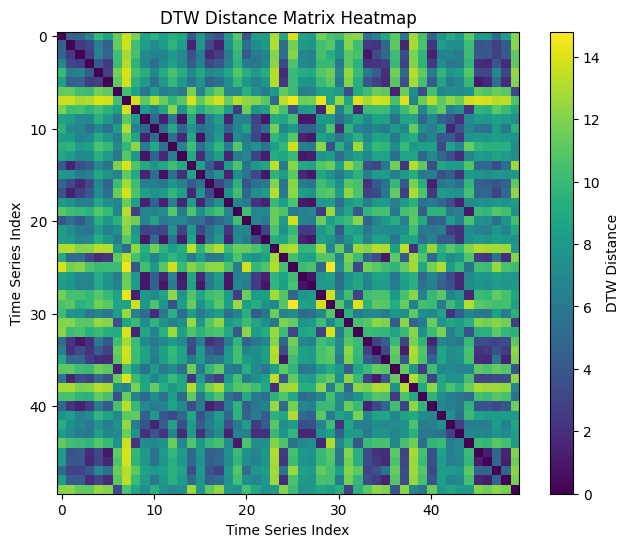

In [17]:
# Visualize the DTW distance matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(distance_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='DTW Distance')
plt.title('DTW Distance Matrix Heatmap')
plt.xlabel('Time Series Index')
plt.ylabel('Time Series Index')
plt.show()

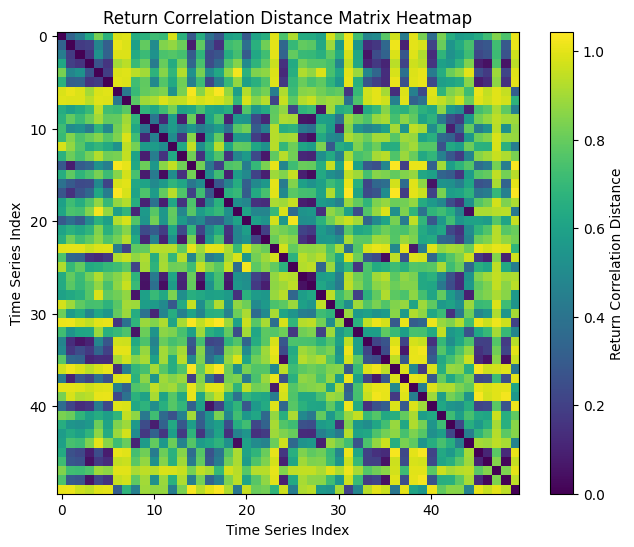

In [20]:
# Visualize the Return Correlation distance matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(return_corr_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Return Correlation Distance')
plt.title('Return Correlation Distance Matrix Heatmap')
plt.xlabel('Time Series Index')
plt.ylabel('Time Series Index')
plt.show()

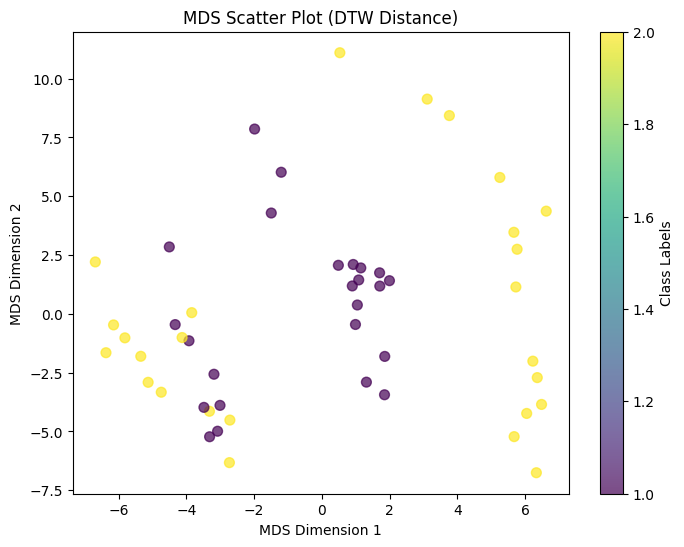

In [21]:
# Use MDS to reduce the dimensionality of the DTW distance matrix for visualization
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
dtw_mds_coords = mds.fit_transform(distance_matrix)

# Scatter plot of the MDS-transformed DTW distance matrix
plt.figure(figsize=(8, 6))
plt.scatter(dtw_mds_coords[:, 0], dtw_mds_coords[:, 1], c=YTRAIN.astype(int), cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Class Labels')
plt.title('MDS Scatter Plot (DTW Distance)')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.show()

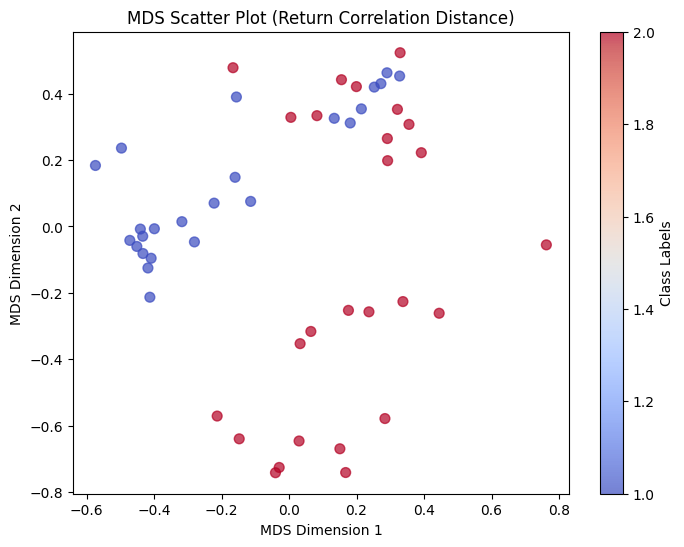

In [23]:
# Use MDS to reduce the dimensionality of the Return Correlation distance matrix for visualization
return_corr_mds_coords = mds.fit_transform(return_corr_matrix)

# Scatter plot of the MDS-transformed Return Correlation distance matrix
plt.figure(figsize=(8, 6))
plt.scatter(return_corr_mds_coords[:, 0], return_corr_mds_coords[:, 1], c=YTRAIN.astype(int), cmap='coolwarm', s=50, alpha=0.7)
plt.colorbar(label='Class Labels')
plt.title('MDS Scatter Plot (Return Correlation Distance)')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.show()